In [1]:
%matplotlib inline
import os, pickle, glob
import cv2
import re
import matplotlib
import numpy as np
import FileIO as fio
import Camera as camsolve
from matplotlib import pyplot as plt
from collections import defaultdict
plt.style.use("ggplot")

In [2]:
rt_path = "/home/liyanc/Desktop/raid/scratch2/pose/processing/staging"
bvh_dir = "resolve_bvh2mat"
marker_dir = "meta_mid"
camparam_dir = "meta_mid/cameras/subj_take/"
timecorr_dir = "meta_mid/alignments"
day_list = ["20180831", "20180901", "20180902", "20180903", "20180906",
           "20180907", "20180911"]

In [3]:
subj2camparam = {
    "liyan": "20180831_liyan_camparams.pkl", "lisi": "20180901_lisi_camparams.pkl",
    "deying": "20180901_lisi_camparams.pkl", "haoyu": "20180902_haoyu_camparams.pkl",
    "shau": "20180902_haoyu_camparams.pkl", "jingwen": "20180903_jingwen_camparams.pkl",
    "zhe": "20180903_jingwen_camparams.pkl", "xie": "20180906_yan_camparams.pkl",
    "yan": "20180906_yan_camparams.pkl", "dy": "20180907_dy_camparams.pkl",
    "tang": "20180907_dy_camparams.pkl", "ryan": "20180911_ryan_camparams.pkl"}
subj2day = {
    "liyan": "20180831", "lisi": "20180901", "deying": "20180901", "haoyu": "20180902",
    "shau": "20180902", "jingwen": "20180903", "zhe": "20180903", "xie": "20180906",
    "yan": "20180906", "dy": "20180907", "tang": "20180907", "ryan": "20180911"}

In [4]:
def spath(subdir):
    return "{:}/{:}".format(rt_path, subdir)

In [5]:
def augpath(base_dir):
    def _augpath(subdir):
        return "{:}/{:}".format(base_dir, subdir)
    return _augpath

# Write Camera Parameters

In [20]:
def orig_cam_param(subj):
    return "{:}/meta_mid/cameras/{:}".format(rt_path, subj2camparam[subj])

In [22]:
dir_path = "{:}/{:}".format(rt_path, camparam_dir)
subj_take_table = defaultdict(dict)
ptn = re.compile("(action_\d{2})|(motion_\d{2})|(zw_static_\d{2})")
for f in glob.glob("{:}/*_camparams.pkl".format(dir_path)):
    fname = os.path.basename(f)
    sub = fname.split("_")[0]
    take = ptn.search(fname).group(0)
    subj_take_table[sub][take] = f

In [12]:
camparams = fio.load_pkl(subj_take_table["liyan"]["action_00"])

In [28]:
for subj, record in subj_take_table.items():
    for take, file in record.items():
        base_param = fio.load_pkl(orig_cam_param(subj))
        if (subj, take) == ("liyan", "action_02"):
            print(file)
            base_param["04"] = camparam_e
        fio.dump_pkl(base_param, file)

/home/liyanc/Desktop/raid/scratch2/pose/processing/staging/meta_mid/cameras/subj_take/liyan_action_02_camparams.pkl


# Gather Master Version Info

In [ ]:
cam_dict = fio.load_cam(apath.camparam_file)
imgdir_io = fio.ImgDirIO(apath.day_subdir, subj, takename)
viddir_io = fio.VideoDirIO(apath.day_subdir, subj, takename)
marker_io = fio.MarkerDirIO(apath.marker_dir)
joint_io = fio.BVHDirIO(apath.bvh_dir)
img_reader = fio.ImgProjReader(cam_dict, imgdir_io, viddir_io)
mkr_reader = fio.MarkerSkeletonProjReader(cam_dict, marker_io, joint_io, subj, takename)

In [ ]:
timeparam_dict = defaultdict(dict)
for subj, record in time_io.subj_take_table.items():
    for take, f in record.items():
        corr = fio.load_pkl(f)
        for cam, corr_pairs in corr.items():
            if (subj, take, cam) not in fio.CamParamDir.block_list:
                print(subj, take, cam, camsolve.ransac_linear_regress(corr_pairs))

# For a single subject

In [5]:
cam_io = fio.CamParamDir("{:}/{:}".format(rt_path, camparam_dir))
time_io = fio.TimeParamDir("{:}/{:}".format(rt_path, timecorr_dir))

subj, takename = "haoyu", "motion_01"
cam_dict = fio.load_cam(cam_io.get_camparam_file(subj, takename))
imgdir_io = fio.ImgDirIO(spath(subj2day[subj]), subj, takename)
viddir_io = fio.VideoDirIO(spath(subj2day[subj]), subj, takename)
marker_io = fio.MarkerDirIO(spath(marker_dir))
joint_io = fio.BVHDirIO(spath(bvh_dir))
img_reader = fio.ImgProjReader(cam_dict, imgdir_io, viddir_io)
mkr_reader = fio.MarkerSkeletonProjReader(cam_dict, marker_io, joint_io, subj, takename)

In [10]:
cam = "04"
ts = viddir_io.read_cam_ts(cam)
joint_list = []
for t in ts:
    mocap_t = int(round(time_io.map_cam_timestamp_2mocap(subj, takename, cam, t)))
    if mocap_t < mkr_reader.get_joint_frame_num():
        joint_list.append(mkr_reader.read_raw_joint(mocap_t))

In [12]:
cam = "00"
frame_ts = imgdir_io.get_imgfile_timestamp(cam)
joint_list = []
for _, t in frame_ts:
    mocap_t = int(round(time_io.map_cam_timestamp_2mocap(subj, takename, cam, t)))
    if mocap_t >= mkr_reader.get_joint_frame_num():
        break
    joint_list.append(mkr_reader.read_raw_joint(mocap_t))

# For all subjects

In [5]:
cam_io = fio.CamParamDir("{:}/{:}".format(rt_path, camparam_dir))
time_io = fio.TimeParamDir("{:}/{:}".format(rt_path, timecorr_dir))

In [ ]:
dis_list = []

for subj, record in time_io.subj_take_table.items():
    for takename, _ in record.items():    
        print(subj, takename)
        cam_dict = fio.load_cam(cam_io.get_camparam_file(subj, takename))
        imgdir_io = fio.ImgDirIO(spath(subj2day[subj]), subj, takename)
        viddir_io = fio.VideoDirIO(spath(subj2day[subj]), subj, takename)
        marker_io = fio.MarkerDirIO(spath(marker_dir))
        joint_io = fio.BVHDirIO(spath(bvh_dir))
        mkr_reader = fio.MarkerSkeletonProjReader(cam_dict, marker_io, joint_io, subj, takename)
        
        for cam in ["00", "01", "02", "03", "04"]:
            if not cam_io.is_blocklisted(subj, takename, cam):
                joint_list = []
                
                if cam in ["03", "04"]:
                    ts = viddir_io.read_cam_ts(cam)
                    for t in ts:
                        mocap_t = int(round(time_io.map_cam_timestamp_2mocap(subj, takename, cam, t)))
                        if mocap_t < mkr_reader.get_joint_frame_num():
                            joint_list.append(mkr_reader.read_raw_joint(mocap_t))
                else:
                    frame_ts = imgdir_io.get_imgfile_timestamp(cam)
                    for _, t in frame_ts:
                        mocap_t = int(round(time_io.map_cam_timestamp_2mocap(subj, takename, cam, t)))
                        if mocap_t >= mkr_reader.get_joint_frame_num():
                            break
                        joint_list.append(mkr_reader.read_raw_joint(mocap_t))
                
                cur = np.array(joint_list)
                dis_per_joint = np.sqrt(np.sum((cur[:-1, :, :] - cur[1:, :, :]) ** 2, axis=2))
                mask = ~np.any(np.isnan(dis_per_joint), axis=1)
                dis_list.append(np.percentile(dis_per_joint[mask], 75, axis=1))

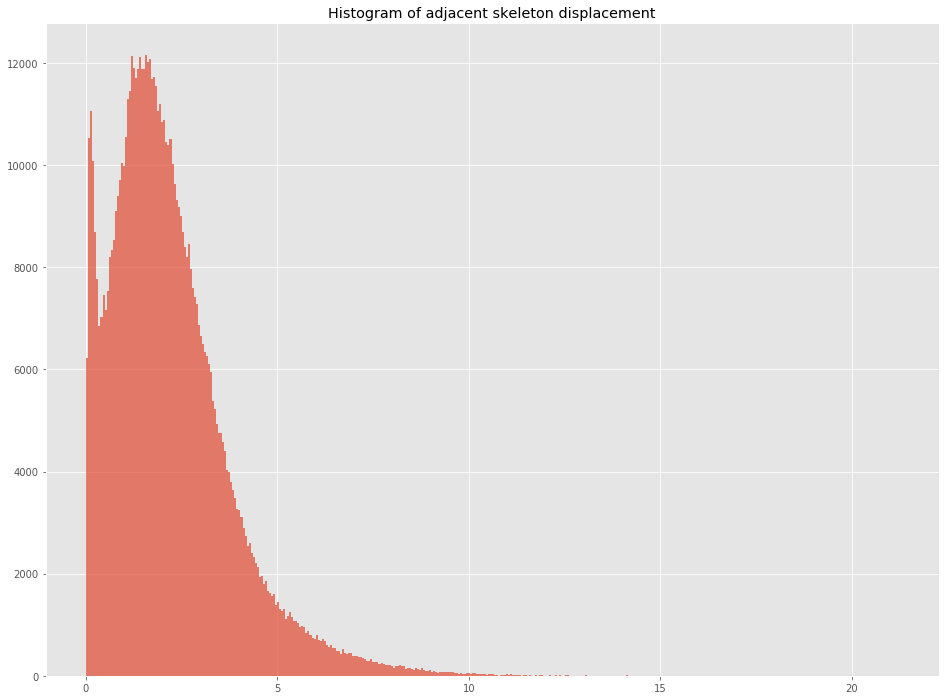

In [10]:
fig = plt.figure(figsize=(16, 12))
_ = plt.hist(np.concatenate(dis_list), bins=400, alpha=0.7)
_ = plt.title("Histogram of adjacent skeleton displacement")

In [8]:
keep_percentage = 45
print("The Threshold for keeping {:}% frames are {:}".format(keep_percentage, np.percentile(np.concatenate(dis_list), 100 - keep_percentage)))

The Threshold for keeping 45% frames are 2.0819192217640703


# Generate Master version

## Meta Data fields
 - ImgID (unique across whole dataset)
 - Source file path
 - Destination file path
 - Session date
 - Subject name
 - Takename
 - Camera ID
 - Camera+Time parameter file
 - Source camera timestamp (in millisecond)
 - Aligned mocap timestamp (in 120fps)
 - Geometry name
 - 53 markers
 - 34 Joints
 - Is in GPA1.0 (adaptive sampling)
 - Is in test set
 - Camera+Time parameter file

In [6]:
adaptive_threshold = 2.0819192217640703

In [7]:
import Execution as exe
import h5py

In [6]:
dst_rt = "/mnt/10T/GPA_master"
src_rt = "/home/liyanc/Desktop/raid/scratch2/pose/processing/staging"
src_path = augpath(src_rt)
dst_path = augpath(dst_rt)

In [9]:
dst_cam_dir = "spacetime_camera"

In [10]:
for subj in subj2day:
    exe.run_command(["mkdir", dst_path(subj)])

In [7]:
cam_io = fio.CamParamDir(src_path(camparam_dir))
time_io= fio.TimeParamDir(src_path(timecorr_dir))

In [11]:
exe.run_command(["mkdir", dst_path(dst_cam_dir)])

In [ ]:
for subj, record in time_io.subj_take_table.items():
    for takename, _ in record.items(): 
        cam_param = fio.load_pkl(cam_io.get_camparam_file(subj, takename))
        for cam in ["00", "01", "02", "03", "04"]:
            if not cam_io.is_blocklisted(subj, takename, cam):
                params = {"spatial": cam_param[cam],
                          "temporal": time_io.get_timeparam(subj, takename)[cam]}
                print(subj, takename, params)
                filename = "{:}/{:}-{:}-{:}-stcams.pkl".format(
                    dst_cam_dir, subj, takename, cam)
                fio.dump_pkl(params, dst_path(filename))

In [8]:
def is_adaptive_sampled(prev, cur):
    dis_per_joint = np.sqrt(np.sum((cur - prev) ** 2, axis=1))
    return np.percentile(dis_per_joint, 75) >= adaptive_threshold

# For a single subject

In [25]:
#subj, takename = "haoyu", "motion_00"

In [12]:
subjtake_cam = {}

for subj, record in time_io.subj_take_table.items():
    for takename, _ in record.items():
        cam_dict = fio.load_cam(cam_io.get_camparam_file(subj, takename))
        subjtake_cam[(subj, takename)] = cam_dict

In [27]:
cam_dict = fio.load_cam(cam_io.get_camparam_file(subj, takename))
imgdir_io = fio.ImgDirIO(src_path(subj2day[subj]), subj, takename)
viddir_io = fio.VideoDirIO(src_path(subj2day[subj]), subj, takename)
marker_io = fio.MarkerDirIO(src_path(marker_dir))
joint_io = fio.BVHDirIO(src_path(bvh_dir))
img_reader = fio.ImgProjReader(cam_dict, imgdir_io, viddir_io)
mkr_reader = fio.MarkerSkeletonProjReader(cam_dict, marker_io, joint_io, subj, takename)

subjtake_cam[(subj, takename)] = cam_dict

In [13]:
# Global
imgid_cntr = 0

In [14]:
def gen_img():
    global imgid_cntr
    for subj, record in time_io.subj_take_table.items():
        for takename, _ in record.items(): 
            
            cam_dict = fio.load_cam(cam_io.get_camparam_file(subj, takename))
            imgdir_io = fio.ImgDirIO(src_path(subj2day[subj]), subj, takename)
            viddir_io = fio.VideoDirIO(src_path(subj2day[subj]), subj, takename)
            marker_io = fio.MarkerDirIO(src_path(marker_dir))
            joint_io = fio.BVHDirIO(src_path(bvh_dir))
            img_reader = fio.ImgProjReader(cam_dict, imgdir_io, viddir_io)
            mkr_reader = fio.MarkerSkeletonProjReader(cam_dict, marker_io, joint_io, subj, takename)

            # Take-specific
            cam_last_test_time = {"00": 0.0, "01": 0.0, "02": 0.0, "03": 0.0, "04": 0.0}
            cam_f_ind = {"00": 0, "01": 0, "02": 0, "03": 0, "04": 0}
            cam_last_joint = {}

            # Don't start blocklisted cameras in the beginning
            for cam in cam_f_ind:
                if cam_io.is_blocklisted(subj, takename, cam):
                    cam_f_ind[cam] = None 

            while not all(v is None for v in cam_f_ind.values()):
                for cam in ["00", "01", "02", "03", "04"]:
                    cam_t = cam_f_ind[cam]
                    if cam_t is not None and cam_t < img_reader.get_frame_num_for_cam(cam):
                        cam_ts = img_reader.read_ts(cam_t, cam)
                    # Termination Criteria
                    if cam_t is None:
                        continue
                    elif cam_t >= img_reader.get_frame_num_for_cam(cam):
                        cam_f_ind[cam] = None
                    elif int(round(time_io.map_cam_timestamp_2mocap(subj, takename, cam, cam_ts))) >= mkr_reader.get_joint_frame_num():
                        cam_f_ind[cam] = None

                    # Begin loading
                    else:
                        mocap_t = int(round(time_io.map_cam_timestamp_2mocap(subj, takename, cam, cam_ts)))
                        # Increment Right away
                        cam_f_ind[cam] += 1

                        if mocap_t >= 0:
                            joints = mkr_reader.read_raw_joint(mocap_t)
                            # Included clips
                            if ~np.any(np.isnan(joints)):
                                # ImageID
                                imgid = imgid_cntr
                                imgid_cntr += 1

                                # Source File, Read File, Frame, Camera Timestamp
                                if cam in ["03", "04"]:
                                    src_file = viddir_io.cam_subj_take_file[cam][subj][takename]
                                    read_file = None

                                    frame, cam_ts = viddir_io.read_cam_frame_ts(cam, cam_t)
                                else:
                                    src_file, cam_ts = imgdir_io.get_imgfile_timestamp(cam)[cam_t]
                                    read_file = src_file
                                    frame = None
                                # Mocap timestamp
                                mocap_ts = time_io.map_cam_timestamp_2mocap(subj, takename, cam, cam_ts)
                                # Session Date
                                sess_date = subj2day[subj]
                                # Camera Param files
                                cam_param_f = "{:}/{:}-{:}-{:}-stcams.pkl".format(dst_cam_dir, subj, takename, cam)
                                # Joints and Marker
                                joints = np.ascontiguousarray(joints)
                                markers = np.ascontiguousarray(mkr_reader.read_raw_skel(mocap_t))
                                # Geometry name
                                geo_name = "_".join(subj2camparam[subj].split(".")[0].split("_")[:2])
                                # Adaptive sampling
                                if cam not in cam_last_joint:
                                    cam_last_joint[cam] = joints
                                    is_gpa1 = True
                                else:
                                    is_gpa1 = is_adaptive_sampled(cam_last_joint[cam], joints)
                                    cam_last_joint[cam] = joints
                                # Test Set
                                if joint_io.subj_take_table[subj][takename]["is_test"]:
                                    is_test = True
                                else:
                                    # Start a new test/train split
                                    if mocap_ts - cam_last_test_time[cam] > 11 * 120:
                                        is_test = True
                                        cam_last_test_time[cam] = mocap_ts
                                    elif mocap_ts - cam_last_test_time[cam] >= 1 * 120:
                                        is_test = False
                                    else:
                                        is_test = True
                                yield imgid, subj, takename, cam, src_file, read_file, frame, cam_ts, mocap_ts, sess_date, cam_param_f, markers, geo_name, is_gpa1, is_test

# Dataflow

In [15]:
from tensorpack import *
from tensorpack.utils.utils import get_tqdm
from tensorpack.utils import logger
import msgpack
import msgpack_numpy
import lmdb
msgpack_numpy.patch()

In [16]:
def process_dp(row):
    imgid, subj, takename, cam, src_file, read_file, frame, cam_ts, mocap_ts, sess_date, cam_param_f, markers, geo_name, is_gpa1, is_test = row
    if frame is None:
        img = subjtake_cam[(subj, takename)][cam].undistort_img(fio.imread_from_lz4(read_file))
    else:
        img = subjtake_cam[(subj, takename)][cam].undistort_img(frame)
    
    img_buf = cv2.imencode(".png", img[:, :, ::-1], (cv2.IMWRITE_PNG_COMPRESSION, 5))[1].tobytes()
    
    dst_file = "{:}/{:0>10}.png".format(subj, imgid)
    
    meta_tuple = imgid, subj, takename, cam, src_file, dst_file, cam_ts, mocap_ts, sess_date, cam_param_f, markers, geo_name, is_gpa1, is_test
    meta_bytes = msgpack.dumps(meta_tuple, use_bin_type=True)
    
    return imgid, subj, takename, cam, dst_file, img_buf, meta_bytes

In [18]:
df = dataflow.DataFromGenerator(gen_img())
mapped_df = dataflow.MultiProcessMapDataZMQ(df, 10, process_dp, strict=True)

In [19]:
def save_img(dst_file, img_buf):
    with open(dst_path(dst_file), "wb") as f:
        f.write(img_buf)

In [20]:
def dump_dataflow_to_lmdb_with_img(df, lmdb_path, write_frequency=500):
    """
    Dump a Dataflow to a lmdb database, where the keys are indices and values
    are serialized datapoints.
    The output database can be read directly by
    :class:`tensorpack.dataflow.LMDBDataPoint`.
    Args:
        df (DataFlow): the DataFlow to dump.
        lmdb_path (str): output path. Either a directory or a mdb file.
        write_frequency (int): the frequency to write back data to disk.
    """
    
    assert isinstance(df, DataFlow), type(df)
    isdir = os.path.isdir(lmdb_path)
    if isdir:
        assert not os.path.isfile(os.path.join(lmdb_path, 'data.mdb')), "LMDB file exists!"
    else:
        assert not os.path.isfile(lmdb_path), "LMDB file exists!"
    df.reset_state()
    db = lmdb.open(lmdb_path, subdir=isdir, map_size=1099511627776 * 2, readonly=False,
                   meminit=False, map_async=True)  # need sync() at the end
    
    try:
        sz = df.size()
    except NotImplementedError:
        sz = 0
    with get_tqdm(total=sz) as pbar:
        idx = -1

        # lmdb transaction is not exception-safe!
        # although it has a contextmanager interface
        txn = db.begin(write=True)
        max_id = 0

        for imgid, subj, takename, cam, dst_file, img_buf, meta_bytes in iter(df):
            save_img(dst_file, img_buf)
            txn.put(u'{:0>10}'.format(imgid).encode('ascii'), meta_bytes)
            if imgid > max_id: max_id = imgid
            pbar.update()
            if (imgid + 1) % write_frequency == 0:
                txn.commit()
                txn = db.begin(write=True)
        txn.commit()

        logger.info("Flushing database ...")
        db.sync()
    db.close()
    return max_id

In [21]:
dump_dataflow_to_lmdb_with_img(mapped_df, dst_path("main_meta.mdb"), write_frequency=2000)

[1101 22:48:21 @argtools.py:152] WRN Install python-prctl so that processes can be cleaned with guarantee.


234530it [6:16:53,  9.24it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

267647it [7:10:01, 11.06it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

300170it [8:02:51, 10.37it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limi

[1102 18:13:15 @parallel_map.py:53] ERR [MultiProcessMapDataZMQ] buffer_size cannot be larger than the size of the DataFlow!
[1102 18:13:16 @<ipython-input-20-fc3912b34b7a>:45] Flushing database ...


719564it [19:24:54, 10.30it/s]


719564

# Projected Person Size

In [1]:
for subj, record in time_io.subj_take_table.items():
    for takename, _ in record.items(): 

        cam_dict = fio.load_cam(cam_io.get_camparam_file(subj, takename))
        imgdir_io = fio.ImgDirIO(src_path(subj2day[subj]), subj, takename)
        viddir_io = fio.VideoDirIO(src_path(subj2day[subj]), subj, takename)
        marker_io = fio.MarkerDirIO(src_path(marker_dir))
        joint_io = fio.BVHDirIO(src_path(bvh_dir))
        img_reader = fio.ImgProjReader(cam_dict, imgdir_io, viddir_io)
        mkr_reader = fio.MarkerSkeletonProjReader(cam_dict, marker_io, joint_io, subj, takename)


